In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import pandas as pd
from IPython.display import display, HTML

In [2]:
# Critere de performance
def compute_pred_score(y_true, y_pred):
    y_pred_unq =  np.unique(y_pred)
    for i in y_pred_unq:
        if((i != -1) & (i!= 1) & (i!= 0) ):
            raise ValueError('The predictions can contain only -1, 1, or 0!')
    y_comp = y_true * y_pred
    score = float(10*np.sum(y_comp == -1) + np.sum(y_comp == 0))
    score /= y_comp.shape[0]
    return score

In [3]:
X_train_fname = 'training_templates.csv'
y_train_fname = 'training_labels.txt'
X_test_fname  = 'testing_templates.csv'
y_train = np.loadtxt(y_train_fname, dtype=np.int)
################################################################################
# # To save as Dataframe:
# X_train_df = pd.read_csv(X_train_fname, sep=',', header=None)
# X_test_df = pd.read_csv(X_test_fname,  sep=',', header=None)
# # display(X_train_df)
# # HTML(X_train_dataframe.to_html())
# # To get the information of DataFrame:
# X_test_df.info()

# According to the following operation, the dataframe doesn't contain NaN value
# X_train_df.isnull().sum()
################################################################################
# To save as np.array:
X_train = pd.read_csv(X_train_fname, sep=',', header=None)
X_test  = pd.read_csv(X_test_fname,  sep=',', header=None).values
print X_train.shape
print y_train.shape
print X_test.shape

(105600, 128)
(105600,)
(8496, 128)


### Selection

In [ ]:
# # Standardization
# from sklearn.preprocessing import StandardScaler
# stdsc = StandardScaler()
# X_train_std = stdsc.fit_transform(X_train)
# X_test_std = stdsc.transform(X_test)

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
print X
# Sample Selection: KNN
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X_test_std)
distances, indices = nbrs.kneighbors(X_train_std)
new_indices = np.ravel(indices)
uni_indices = np.unique(indices)
print nbrs
print indices
print distances
print new_indices
print uni_indices
X_train_repeat = Y[new_indices]
X_train_unique = Y[uni_indices]
print X_train_repeat
print X_train_unique

# # PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=128, whiten=True, svd_solver='auto')
# X_train_pca = pca.fit_transform(X_train_std)
# X_test_pca = pca.transform(X_test_std)

# # split data into train and test sets
# from sklearn.cross_validation import train_test_split
# seed = 0
# test_size = 0.2
# X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_pca, y_train, 
#                                                                 test_size=test_size, random_state=seed, stratify=y_train)
# print X_train_split.shape, y_train_split.shape
# print X_test_split.shape, y_test_split.shape
# print np.mean(y_train_split)

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]


In [4]:
# To contat the samples with their class(sex)
cls = pd.Series(y_train, name='sex')
df = pd.concat([X_train_df, cls], axis=1)
# display(df)

# To generate a 100-row data: test plot
rand_idx = np.random.choice(df.index,2000, replace=False)
df_new = df.ix[rand_idx]
display(df_new)

0         1         2         3         4         5         6  \
102179  0.126908  0.083176  0.088573  0.098769  0.081608  0.171096  0.112246   
100014 -0.039636  0.098369 -0.046174  0.125013  0.074950  0.128690  0.065569   
4182    0.130335 -0.172331  0.008852 -0.094848 -0.011580 -0.115836  0.069186   
86832  -0.013865  0.017702  0.028402 -0.061239 -0.061492  0.043314  0.061088   
22498  -0.083554  0.034698  0.109404  0.113267  0.042561  0.164136 -0.040647   
4271   -0.103247 -0.159865 -0.070048  0.091595 -0.086562 -0.120238  0.046401   
85366   0.007320  0.052086  0.138142 -0.019065  0.108000  0.060494 -0.025535   
7341    0.023987 -0.022676 -0.028083  0.074913  0.007707  0.050863 -0.026358   
53234  -0.040909  0.243635  0.048339  0.030509 -0.121588  0.151985 -0.030568   
48336  -0.055781  0.144840  0.036785 -0.046460  0.005549 -0.128243  0.030602   
17759   0.059956 -0.043831  0.027716 -0.132249 -0.159767 -0.150035  0.022397   
70429  -0.054867 -0.150668  0.034035 -0.043935  0.027663 -0.029145 -0.114527   
65724  -0.033197 -0.117086 -0.072638 -0.077134  0.050765 -0.032933  0.107164   
52262   0.000514  0.094468 -0.074302 -0.079530 -0.023914  0.275467  0.111793   
1480   -0.053519 -0.067837 -0.047928  0.012702 -0.035398  0.014586  0.072971   
68199  -0.068470  0.010426  0.050586 -0.145320  0.028311  0.137437 -0.052411   
101204 -0.013741  0.156643  0.080793  0.008131  0.042793  0.096171  0.084879   
34571  -0.055940  0.093404  0.047509  0.022797  0.038874 -0.001183  0.075598   
72906  -0.019512  0.027353  0.053745  0.164631  0.104177 -0.052022  0.013632   
14988  -0.063941 -0.202518 -0.038699  0.082695 -0.041196  0.011125 -0.105120   
66249  -0.018168  0.112522  0.070148  0.019358  0.138615 -0.144672  0.029940   
61858   0.058113  0.042482  0.063454 -0.092908  0.082470  0.017680  0.023536   
99948   0.094334  0.054615  0.105463  0.033131 -0.010481 -0.103845  0.093165   
79290   0.200932 -0.001425 -0.117173 -0.003093  0.045112  0.004565  0.129656   
98820   0.118873  0.108953 -0.137421 -0.181582  0.031737  0.092109  0.156855   
5901   -0.092010 -0.066731 -0.057904 -0.001676  0.034663 -0.020874 -0.155365   
85329   0.069696 -0.051553 -0.121206  0.050855  0.023246  0.153951  0.110890   
32971   0.057555 -0.060824  0.034468 -0.069466  0.105505  0.038443  0.119627   
86326  -0.119213  0.013055 -0.050119  0.026190 -0.070148 -0.114149  0.062847   
98186  -0.021423  0.060775  0.095054  0.068271 -0.075673 -0.011719  0.042700   
...          ...       ...       ...       ...       ...       ...       ...   
5260   -0.086304 -0.025696 -0.066245 -0.023704 -0.002031 -0.070038 -0.024295   
78483   0.131467  0.055086 -0.082945  0.094696 -0.128245 -0.023314  0.032922   
61701  -0.031847  0.077194 -0.041587 -0.083783 -0.092340  0.002163  0.030301   
104436  0.000603 -0.036070 -0.040354  0.042409  0.012610  0.053865 -0.074131   
60939   0.111476 -0.039203  0.039424 -0.117042 -0.136550 -0.036641 -0.097620   
77488  -0.093033  0.008387  0.030449  0.179834 -0.075795 -0.033692  0.044083   
12583   0.029946 -0.017794  0.063545  0.056967 -0.020396  0.023922 -0.149618   
14119  -0.003588  0.036221 -0.009424  0.018926  0.035633  0.020389  0.067484   
90742   0.104418 -0.075092 -0.048202 -0.136407  0.117531  0.009327  0.167782   
76972   0.073391 -0.077804  0.019207 -0.009331 -0.150406  0.019427  0.187836   
90136   0.064682  0.003902 -0.146197 -0.066946  0.048893  0.044684  0.056709   
23761   0.126324 -0.016815 -0.084148  0.030710 -0.070379 -0.020330  0.041401   
25499  -0.147831  0.022813  0.014360  0.069942 -0.018330  0.288713 -0.018291   
69915  -0.043421 -0.070097  0.108110  0.001912 -0.054378  0.089053 -0.006361   
31675  -0.014032 -0.026341 -0.051997 -0.043625  0.096297 -0.027673  0.000553   
1866    0.039700  0.006895 -0.110954 -0.207063 -0.035638  0.043116  0.026652   
64365  -0.090375 -0.042627 -0.035262  0.074318 -0.045104 -0.229260 -0.086251   
35706  -0.113501  0.051911 -0.133053 -0.081323  0.028690  0.023640 -0.015037   
48152  -0.09022

### Data Visualization

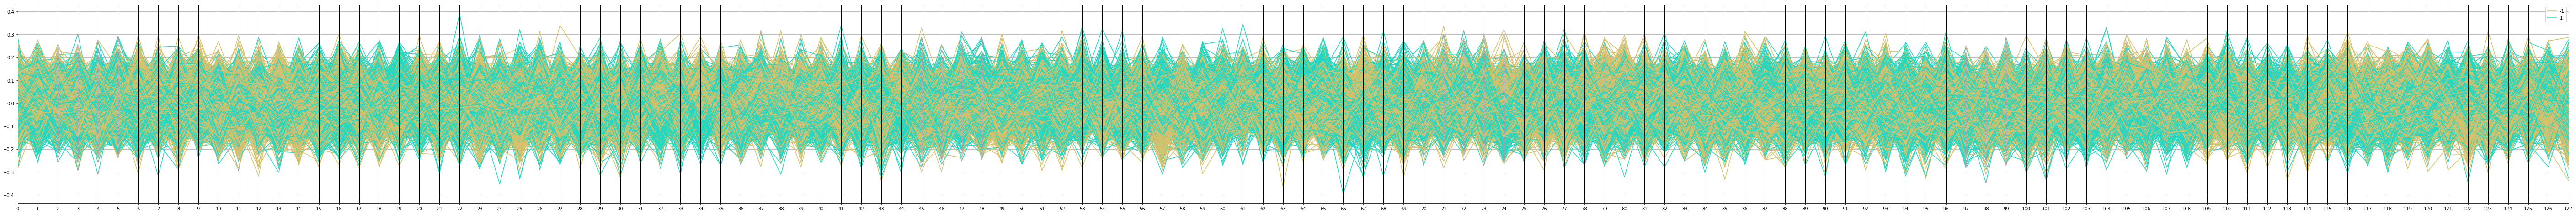

In [5]:
from pandas.tools.plotting import parallel_coordinates 
plt.figure(figsize=(100,8))
parallel_coordinates(df_new, 'sex')

### Data Delete : IN test_mlp

In [5]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)

In [ ]:
# kernal PCA
from scipy.spatial.distance import pdist, squareform
from scipy import exp


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=128, whiten=True)
X_train_pca = pca.fit_transform(X_train_std)
# X_test_pca = pca.transform(X_test_std)
import time
start = time.clock()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf = LogisticRegression()
clf.fit(X_train_pca, y_train)

# Prediction
y_pred_train =  clf.predict(X_train_pca)

# Compute the score
score = compute_pred_score(y_train, y_pred_train)
print('Score sur le train : %s' % score)
end = time.clock()
print "Running Time: ",end-start

Score sur le train : 0.635606060606
Running Time:  1.593387


In [58]:
# split data into train and test sets
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
seed = 0
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=seed)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(84480, 128) (84480,)
(21120, 128) (21120,)


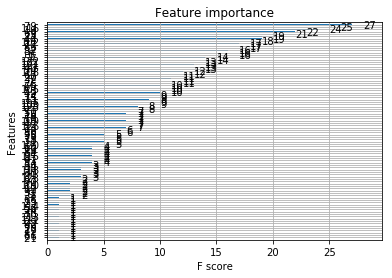

Running Time:  77.68805


In [59]:
import time
start = time.clock()
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt
clf = XGBClassifier()
clf.fit(X_train,y_train)
# # make predictions for test data and evaluate
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# plot feature importance
plt.figure(figsize=(12, 50))
plot_importance(clf)
plt.savefig('fig1.png', dpi = 600)
plt.show()
plt.close()
# y_pred_test = clf.predict(X_test)
# score = compute_pred_score(y_test, y_pred_test)
# print('Score sur le train : %s' % score)
end = time.clock()
print "Running Time: ",end-start

In [53]:
from sklearn import cross_validation
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = cross_validation.StratifiedKFold(y, 2)
for train_index, test_index in skf:
    print "TRAIN:", train_index, "TEST:", test_index
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
# TRAIN: [1 3] TEST: [0 2]
# TRAIN: [0 2] TEST: [1 3]

TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


In [ ]:
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
skf = cross_validation.StratifiedKFold(y, k=3)
